## Problem 1 (LASSO and Ridge regression)
### (a)、(b)

In [41]:
from sklearn.linear_model import Lasso, Ridge
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [54]:
# load data
data = scipy.io.loadmat('05HW1_diabetes.mat')
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

# 𝜆 = {0.01, 0.1, 1, 10, 100, 1000}
Lambda = (0.01, 0.1, 1, 10, 100, 1000)
log_Lambda = np.log10(Lambda)

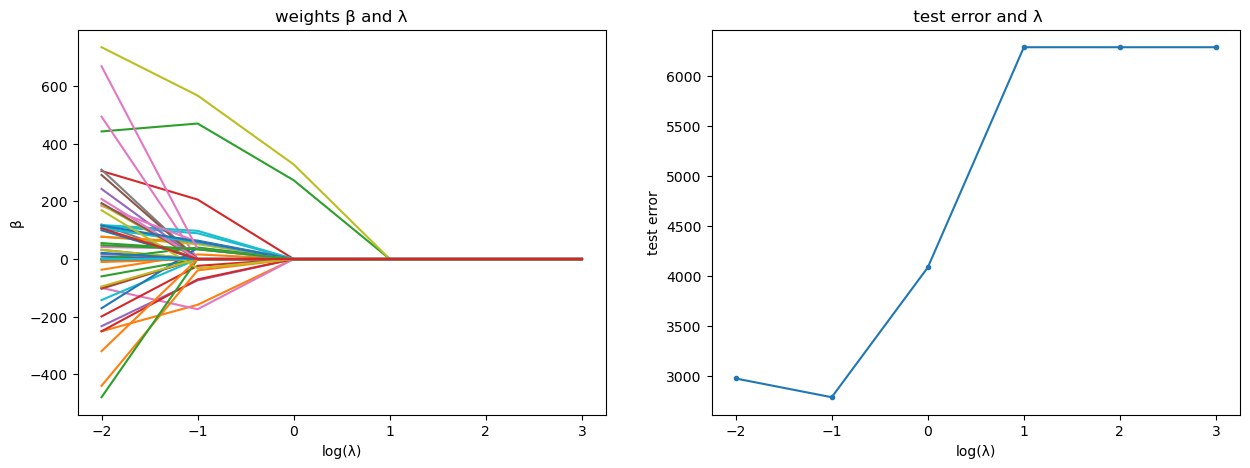

In [57]:
lasso_weight = []
lasso_error = []
for l in Lambda:
    # LASSO
    lasso_model = Lasso(alpha=l)
    lasso_model.fit(x_train, y_train)
    lasso_weight.append(lasso_model.coef_)
    y_pred = lasso_model.predict(x_test)
    # test error
    lasso_error.append(mean_squared_error(y_test, y_pred))

# display
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(log_Lambda, lasso_weight)
plt.title('weights β and λ')
plt.xlabel('log(λ)')
plt.ylabel('β')

plt.subplot(122)
plt.plot(log_Lambda, lasso_error,'.-')
plt.title(' test error and λ')
plt.xlabel('log(λ)')
plt.ylabel('test error')
plt.show()

### (c)

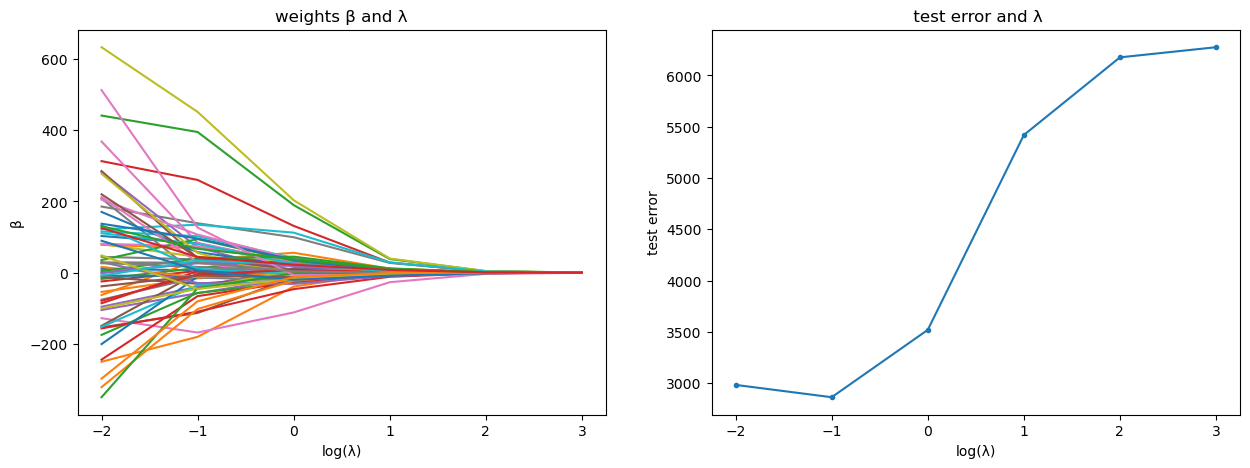

In [46]:
ridge_weight = []
ridge_error = []
for l in Lambda:
    # Ridge
    ridge_model = Ridge(alpha=l)
    ridge_model.fit(x_train, y_train)
    ridge_weight.append(ridge_model.coef_.reshape(-1))
    y_pred = ridge_model.predict(x_test)
    # test error
    ridge_error.append(mean_squared_error(y_test, y_pred))

# display
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.plot(log_Lambda, ridge_weight)
plt.title('weights β and λ')
plt.xlabel('log(λ)')
plt.ylabel('β')

plt.subplot(122)
plt.plot(log_Lambda, ridge_error,'.-')
plt.title(' test error and λ')
plt.xlabel('log(λ)')
plt.ylabel('test error')
plt.show()

## Problem 2 (LASSO regression) 

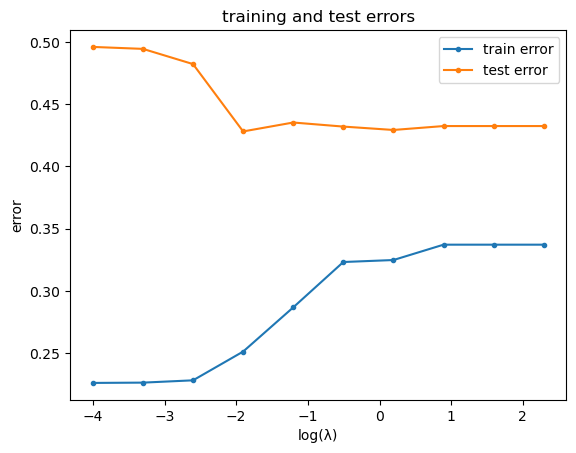

Lambda of minimized test error =  0.0125


In [58]:
Lambda = (0.0001, 0.0005, 0.0025, 0.0125, 0.0625, 0.3125, 1.5625, 7.815, 39.0625, 195.3125)
Lambda_log = np.log10(Lambda)

# load data
train = np.loadtxt('05HW2_wine_training.txt')
train_x = train[:,:-1]
train_y = train[:,-1]
test = np.loadtxt('05HW2_wine_test.txt')
test_x = test[:,:-1]
test_y = test[:,-1]

train_error=[]
test_error=[]
for l in (Lambda):
    # lasso
    model = Lasso(alpha=l)
    model.fit(train_x, train_y)
    pred_y1 = model.predict(train_x)
    pred_y2 = model.predict(test_x)
    # test error
    train_error.append(mean_squared_error(train_y, pred_y1))
    test_error.append(mean_squared_error(test_y, pred_y2))

plt.figure()
plt.plot(Lambda_log, train_error, '.-', label = "train error")
plt.plot(Lambda_log, test_error, '.-', label = "test error")
plt.legend()
plt.xlabel('log(λ)')
plt.ylabel('error')
plt.title('training and test errors')
plt.show()

print('Lambda of minimized test error = ',Lambda[test_error.index(min(test_error))])